In [1]:
import numpy as np
from matplotlib.pyplot import *
%matplotlib notebook

# import elm functions
sys.path.append("../package/")
import ELM as elm

# Fit to a sinc function

<IPython.core.display.Javascript object>


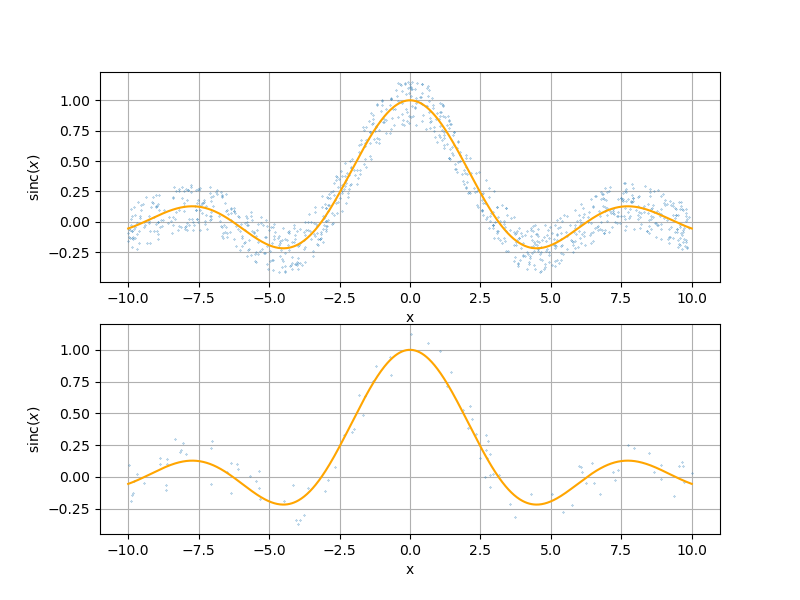

In [2]:
domain = np.linspace(-10.,10.,1000)

# sample generation from uniformly random generated sinc points
N = 1000  # sample size
x_sample = np.random.uniform(-10.,10., N)
y_sample = elm.sinc(x_sample)+np.random.uniform(-0.2,0.2, N)

L = 100  # test size
x_test = np.random.uniform(-10.,10., L)
y_test = elm.sinc(x_test)+np.random.uniform(-0.2,0.2, L)

fig, axs = subplots(2, figsize=(8,6))
axs[0].plot(x_sample, y_sample, ".", markersize=0.5)
axs[0].plot(domain, elm.sinc(domain), "-", color="orange")
axs[0].set_ylabel(r"sinc$\left(x\right)$")
axs[0].set_xlabel("x")
axs[0].grid()

axs[1].plot(x_test, y_test, ".", markersize=0.5)
axs[1].plot(domain, elm.sinc(domain), "-", color="orange")
axs[1].set_ylabel(r"sinc$\left(x\right)$")
axs[1].set_xlabel("x")
axs[1].grid()



In [22]:
n = 10  ## NUMBER OF NODES
use_bias = False

B, H, w, b = elm.ELM(x_sample, y_sample, n=n, use_bias=use_bias)

<IPython.core.display.Javascript object>


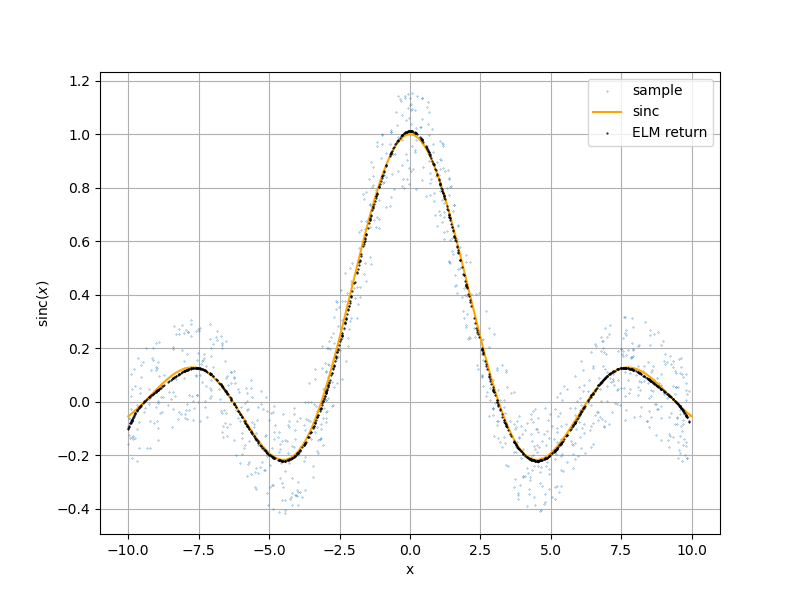

In [23]:
t = elm.prediction(H, B)

fig, axs = subplots(1, figsize=(8,6))
axs.plot(x_sample, y_sample, ".", markersize=0.5, label="sample")
axs.plot(domain, elm.sinc(domain), "-", color="orange", label="sinc")
axs.plot(x_sample, t, "o", color="k", markersize=0.5, label="ELM return")
axs.set_ylabel(r"sinc$\left(x\right)$")
axs.set_xlabel("x")
axs.legend()
axs.grid()

In [6]:
H2 = elm.ELM_test(x_test, w, b, use_bias=use_bias, n=n)

<IPython.core.display.Javascript object>


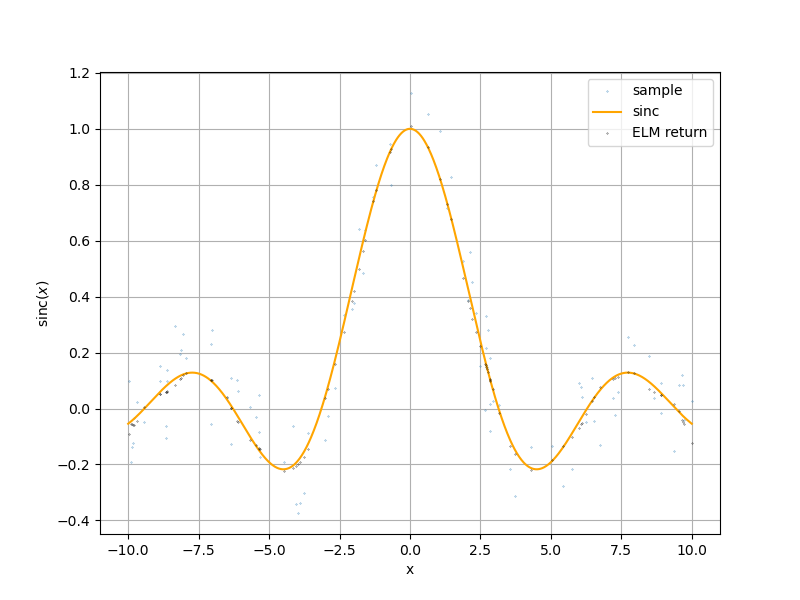

In [7]:
t = elm.prediction(H2, B)

fig, axs = subplots(1, figsize=(8,6))
axs.plot(x_test, y_test, ".", markersize=0.5, label="sample")
axs.plot(domain, elm.sinc(domain), "-", color="orange", label="sinc")
axs.plot(x_test, t, ".", color="k", markersize=0.5, label="ELM return")
axs.set_ylabel(r"sinc$\left(x\right)$")
axs.set_xlabel("x")
axs.legend()
axs.grid()

### Loss with nodes

In [8]:
r = 50
n = np.linspace(1,r,r).astype("int")


## EXTREME LEARNING MACHINE
def ELM(x, y, w, n=10, g=elm.sinc, use_bias=False):
    # step 1
    b = np.random.uniform(0.,1., n)
    
    # step 2
    if use_bias==False:
        H = np.array([g(np.array([w[i]*x[j] for i in range(n)])) for j in range(x.shape[0])])
    else:
        H = np.array([g(np.array([w[i]*x[j] + b[i] for i in range(n)])) for j in range(x.shape[0])])
    
    #  pseudo-inverse
    Ht = np.linalg.pinv(H, hermitian=False)
        
    B = np.array([np.sum(Ht[i]*y) for i in range(n)])
    
    return B, H, w, b

loss_unbiased = np.zeros(n.shape[0])
val_loss_unbiased = np.zeros(n.shape[0])
loss_biased = np.zeros(n.shape[0])
val_loss_biased = np.zeros(n.shape[0])
for node in range(n.shape[0]):
    use_bias = False
    B, H, w, b = elm.ELM(x_sample, y_sample, n=n[node], use_bias=use_bias)
    H2 = elm.ELM_test(x_test, w, b, use_bias=use_bias, n=n[node])
    
    loss_unbiased[node] = elm.loss(y_sample, elm.prediction(H,B))
    val_loss_unbiased[node] = elm.loss(y_test, elm.prediction(H2,B))
    
    use_bias = True
    
    B, H, w, b = ELM(x_sample, y_sample, w, n=n[node], use_bias=use_bias)
    H2 = elm.ELM_test(x_test, w, b, use_bias=use_bias, n=n[node])
    
    loss_biased[node] = elm.loss(y_sample, elm.prediction(H,B))
    val_loss_biased[node] = elm.loss(y_test, elm.prediction(H2,B))

<IPython.core.display.Javascript object>


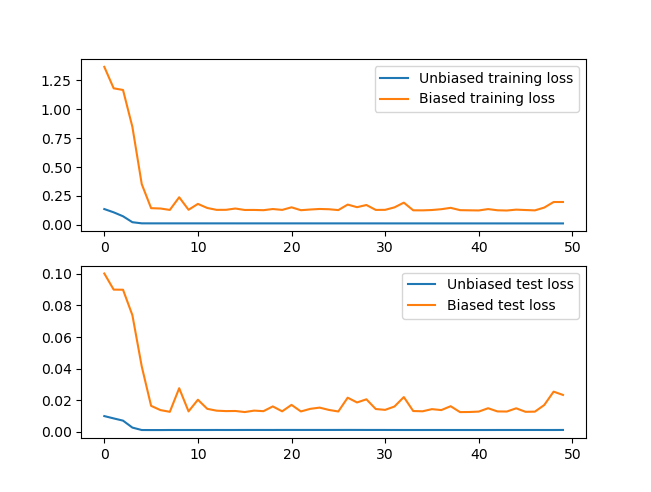

In [9]:
fig, axs = subplots(2)
axs[0].plot(loss_unbiased/len(x_sample), label="Unbiased training loss")
axs[1].plot(val_loss_unbiased/len(x_sample), label="Unbiased test loss")

axs[0].plot(loss_biased/len(y_test), label="Biased training loss")
axs[1].plot(val_loss_biased/len(y_test), label="Biased test loss")

axs[0].legend()
axs[1].legend()

# Sample with random noise

In [36]:
n = 20

noise_percentage = np.linspace(0., 0.15, 16)  # error percentage of total value
M = 1000

use_bias = False

loss = np.zeros((noise_percentage.shape[0],M))
loss_noise = np.zeros((noise_percentage.shape[0],M))
for r in range(noise_percentage.shape[0]):
    for m in range(M):
        x_sample_noise = x_sample + np.array([np.random.uniform(-noise_percentage[r]*x_sample[i], noise_percentage[r]*x_sample[i], 1)[0] for i in range(x_sample.shape[0])])
        x_test_noise = x_test + np.array([np.random.uniform(-noise_percentage[r]*x_test[i], noise_percentage[r]*x_test[i], 1)[0] for i in range(x_test.shape[0])])
        y_test_noise = y_test + np.array([np.random.uniform(-noise_percentage[r]*y_test[i], noise_percentage[r]*y_test[i], 1)[0] for i in range(y_test.shape[0])])
        y_sample_noise = y_sample + np.array([np.random.uniform(-noise_percentage[r]*y_sample[i], noise_percentage[r]*y_sample[i], 1)[0] for i in range(y_sample.shape[0])])

        B, H, w, b = elm.ELM(x_sample_noise, y_sample_noise, n=n, use_bias=use_bias)
        H2 = elm.ELM_test(x_test_noise, w, b, use_bias=use_bias, n=n)
        t = elm.prediction(H2, B)
    
        loss[r, m] = elm.loss(y_test, t)
        loss_noise[r, m] = elm.loss(y_test_noise, t)

<IPython.core.display.Javascript object>


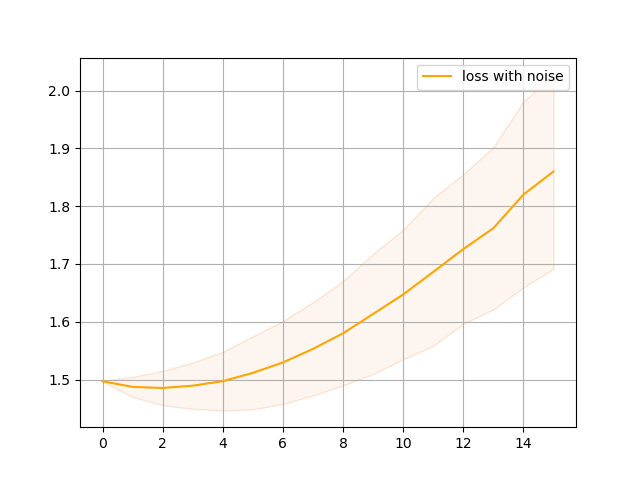

In [40]:
fig, axs = subplots(1)

axs.plot(np.arange(len(loss_noise)), np.mean(loss_noise, axis=1), label="loss with noise", color="orange")
axs.fill_between(np.arange(len(loss_noise)), np.mean(loss_noise, axis=1)-np.sqrt(np.var(loss_noise,axis=1)), np.mean(loss_noise, axis=1)+np.sqrt(np.var(loss_noise,axis=1)), alpha=0.2, edgecolor='#f78d46', facecolor='#f7d0af', antialiased=True)

axs.legend()
axs.grid()

# Error in weights ($w$)

In [22]:
n = 20

noise_percentage = np.linspace(0., 0.15, 16)  # error percentage of total value
M = 100

use_bias = False

loss = np.zeros((noise_percentage.shape[0],M))
for r in range(noise_percentage.shape[0]):
    for m in range(M):
        B, H, w, b = elm.ELM(x_sample, y_sample, n=n, use_bias=use_bias)

        w_noise = w + np.array([np.random.uniform(-noise_percentage[r]*w[i], noise_percentage[r]*w[i], 1)[0] for i in range(w.shape[0])])
        H2 = elm.ELM_test(x_test, w_noise, b, use_bias=use_bias, n=n)

        t = elm.prediction(H2, B)


        loss[r, m] = elm.loss(y_test, t)

<IPython.core.display.Javascript object>


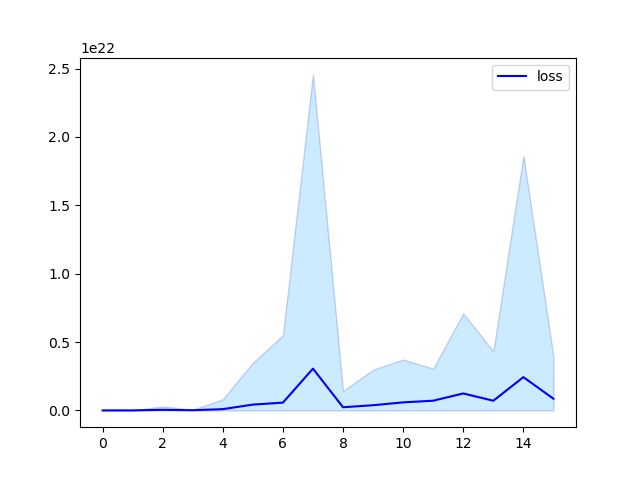

In [23]:
fig, axs = subplots(1)
axs.plot(np.arange(len(loss)), np.mean(loss,axis=1), label="loss", color="b")
#axs.fill_between(np.arange(len(loss)), np.max(loss,axis=1), np.min(loss,axis=1), alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF', antialiased=True)

def above_zero_only(x):
    for i in range(x.shape[0]):
        if x[i]<0:
            x[i]=0.
    return x

axs.fill_between(np.arange(len(loss)), above_zero_only(np.mean(loss,axis=1)-np.sqrt(np.var(loss,axis=1))), np.mean(loss,axis=1)+np.sqrt(np.var(loss,axis=1)), alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF', antialiased=True)

axs.legend()


# Errors in output weights ($\beta$)

In [24]:
n = 20

noise_percentage = np.linspace(0., 0.15, 16)  # error percentage of total value
M = 100

use_bias = False

loss = np.zeros((noise_percentage.shape[0],M))
for r in range(noise_percentage.shape[0]):
    for m in range(M):
        B, H, w, b = elm.ELM(x_sample, y_sample, n=n, use_bias=use_bias)

        B_noise = B + np.array([np.random.uniform(-noise_percentage[r]*B[i], noise_percentage[r]*B[i], 1)[0] for i in range(B.shape[0])])
        H2 = elm.ELM_test(x_test, w, b, use_bias=use_bias, n=n)

        t = elm.prediction(H2, B_noise)


        loss[r, m] = elm.loss(y_test, t)

<IPython.core.display.Javascript object>


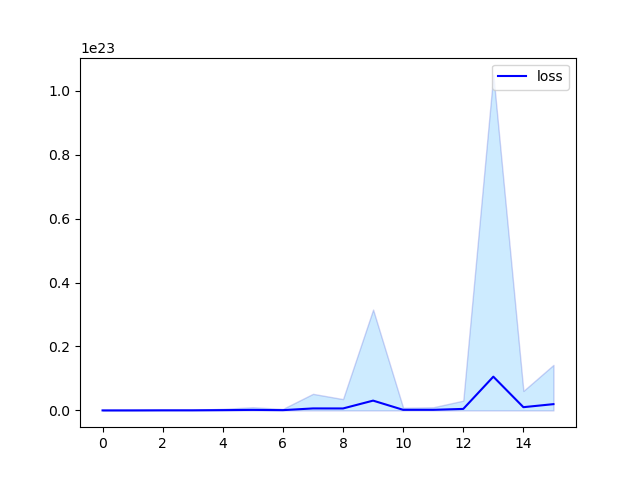

In [25]:
fig, axs = subplots(1)
axs.plot(np.arange(len(loss)), np.mean(loss,axis=1), label="loss", color="b")
#axs.fill_between(np.arange(len(loss)), np.max(loss,axis=1), np.min(loss,axis=1), alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF', antialiased=True)

def above_zero_only(x):
    for i in range(x.shape[0]):
        if x[i]<0:
            x[i]=0.
    return x

axs.fill_between(np.arange(len(loss)), above_zero_only(np.mean(loss,axis=1)-np.sqrt(np.var(loss,axis=1))), np.mean(loss,axis=1)+np.sqrt(np.var(loss,axis=1)), alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF', antialiased=True)

axs.legend()
